<a href="https://colab.research.google.com/github/RadimKozl/Neural-network-research/blob/main/bayesian-graphsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bayesian GraphSAGE: Scalable protein function prediction on the ogbn-proteins dataset**
Implementing multi-label classification with uncertainty estimation using JAX/NNX and PyArrow.

## ***Dataset description: ogbn-proteins (Biological network)***

On your laptop, you are working with a dataset from the **Open Graph Benchmark (OGB)** series, which represents the cutting edge in testing graph algorithms.

- **Povaha dat:** Reprezentuje vztahy mezi proteiny v různých biologických organismech.
- **Structure:**
    - **Nodes (132,534):** Individual proteins.
    - **Edges (39,473,625):** Represent 8 types of interactions (e.g. homology, co-expression).
- **Input Features:** Nodes initially have no features of their own. Your process uses **8-dimensional edge vectors** (link features) that are aggregated into nodes as initial features.
- **Target:** Multi-label classification. You predict **112 binary labels** at once, corresponding to the presence of a protein in various biological functions.

## ***Teorie: Bayesian GraphSAGE***

Your model in your laptop is not just a standard neural network, it's an inductive and probabilistic system.

### ***A. GraphSAGE (Inductive learning)***

Unlike transductive models (like GCN) that require the entire graph in memory, GraphSAGE learns the **aggregation function**. This means that after training, your model can process proteins it never saw during training.

**Key mechanism (SAmple and aggreGatE):** The model selects a fixed number of neighbors for each node in (Neighbor Sampling) and performs a state update:

$$
h_v^{(k)} = \sigma \left( W^k \cdot \text{CONTACT} \left( h_v^{(k-1)}, \text{AGG} \left( \{ h_u^{(k-1)} , \forall u \in N(v) \}  \right) \right) \right)
$$

- You are using **Mean Aggregator** (neighbor averaging) in your laptop.

### ***B. Bayesian Uncertainty (MC Dropout)***

The reason the model is called "Bayesian" is the implementation of **Monte Carlo Dropout**.

- **Theory:** Gal & Ghahramani proved that the application of Dropout during inference is mathematically equivalent to the approximation of Gaussian processes.
- **Usage in a laptop:** Even when testing (inference), you leave Dropout on. If you run the model N times, you get a distribution of results. The mean is your prediction and the variance is your uncertainty.

## ***Tutorial Description (Implementation process on a laptop)***

The notebook is divided into logical blocks that form the production pipeline:

### ***Phase 1: Data Layer (Hybrid Storage)***

Here you implement the critical solution for large graphs:

- **PyArrow (Parquet):** Use it to store 39 million edges and node properties. Thanks to memory-mapping, you only load what you need.
- **SQLite:** Serves as a fast topological index. The model asks SQLite: "Who are the neighbors of node 42?" and SQLite returns the rows in the Parquet file.

### ***Phase 2: Model Architecture in NNX***

You are using **JAX NNX**, which is an object-oriented API.

- **Neighbor Sampling:** At each training step, your dataloader randomly selects 10-25 neighbors for each layer. This prevents memory overflow (Memory Out of Memory).
- **Multi-label Head:** The last layer has 112 outputs with **Sigmoid** activation.

### ***Phase 3: Training and Optimization***

- **Loss:** You use `Binary Cross Entropy` calculated over all 112 labels.
- **JIT Kompilace:** Funkce `train_step` je obalena `@jax.jit`, což zkompiluje tvůj Python kód do vysoce optimalizovaného strojového kódu pro GPU/TPU (OpenXLA).

## ***Why is this solution "Production-Ready"?***

This approach, which you have in your laptop, solves the three biggest pain points of graphing tasks:

1. **Memory:** Thanks to PyArrow and neighbor sampling, you don't need 128GB of RAM.
2. **Speed:** JAX and XLA compilations allow you to train millions of edges in minutes.
3. **Credibility:** The Bayesian element gives your predictions a "certificate of certainty", which is essential in biochemistry or industry.

***Summary of components for your documentation:***

|Element|Implementation in a laptop|Theoretical benefit|
|--------|-------------------------|-------------------|
|**Data**|PyArrow + SQLite|Efficient I/O for giant graphs|
|**Model**|GraphSAGE (NNX)|Inductive capability (new nodes)|
|**Inference**|MC Dropout|Uncertainty estimation (Bayesian)|
|**Engine**|JAX / OpenXLA|Maximum HW acceleration|

## ***Environment settings***

In [ ]:
!rm -r /content/sample_data

In [ ]:
# Remove existing JAX installations
!pip uninstall -y -qq jax jaxlib jax-cuda12-plugin

In [ ]:
# Install JAX
!pip install -qq --upgrade "jax[cuda12]"
!pip install tensorboard
!pip install tensorboard-plugin-profile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 12.2 MB/s eta 0:00:00


In [ ]:
# Install core dependencies
%pip -qq install --upgrade jax jaxlib flax optax orbax-checkpoint grain
%pip -qq install numpy matplotlib scipy
%pip -qq install torch torchvision
%pip -qq install datasets
%pip -qq install msgpack requests tqdm
%pip -qq install bitsandbytes
%pip -qq install jraph
%pip -qq install networkx
%pip -qq install ogb
%pip -qq install pyarrow
%pip -qq install db-sqlite3
%pip -qq install pandas polars
%pip -qq install bitsandbytes numpyro langdetect
%pip -qq install xprof
%pip -qq install jax2onnx
%pip -qq install onnx onnxruntime
%pip -qq install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.0/488.0 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 504.3/504.3 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.5/753.5 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Install Git LFS for large files
!apt install git-lfs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
print(100*"-")
%pip show jax
print(100*"-")
%pip show jaxlib
print(100*"-")
%pip show jax-cuda12-plugin
print(100*"-")
%pip show flax
print(100*"-")
%pip show optax
print(100*"-")
%pip show torch
print(100*"-")
%pip show torchvision
print(100*"-")
%pip show orbax-checkpoint
print(100*"-")
%pip show numpy
print(100*"-")
%pip show tqdm
print(100*"-")
%pip show datasets
print(100*"-")
%pip show msgpack
print(100*"-")
%pip show bitsandbytes
print(100*"-")
%pip show jraph
print(100*"-")
%pip show networkx
print(100*"-")
%pip show ogb
print(100*"-")
%pip show pyarrow
print(100*"-")
%pip show db-sqlite3
print(100*"-")
%pip show polars
print(100*"-")
%pip show pandas
print(100*"-")
%pip show grain
print(100*"-")
%pip show bitsandbytes
print(100*"-")
%pip show numpyro
print(100*"-")
%pip show langdetect
print(100*"-")
%pip show xprof
print(100*"-")
%pip show jax2onnx
print(100*"-")
%pip show onnx
print(100*"-")
%pip show onnxruntime
print(100*"-")
%pip show tensorboard-plugin-profile
print(100*"-")
%pip show numpy
print(100*"-")
%pip show matplotlib
print(100*"-")
%pip show scipy
print(100*"-")
%pip show kagglehub
print(100*"-")

----------------------------------------------------------------------------------------------------
Name: jax
Version: 0.8.2
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: jaxlib, ml_dtypes, numpy, opt_einsum, scipy
Required-by: chex, dopamine_rl, equinox, flax, jax2onnx, jraph, numpyro, optax, orbax-checkpoint, orbax-export
----------------------------------------------------------------------------------------------------
Name: jaxlib
Version: 0.8.2
Summary: XLA library for JAX
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: ml_dtypes, numpy, scipy
Required-by: chex, dopamine_rl, jax, jraph, numpyro, optax, orbax-export
---------------------------------------------------------------

In [ ]:
print("Environment setup complete!")

Environment setup complete!


## ***Import and configuration***

In [ ]:
import os
import sys
import io
import glob
import gc
import kagglehub

import warnings
warnings.filterwarnings("ignore")

import json
import time
import tensorflow as tf
import subprocess
import pickle
import zipfile
import base64
import shutil
import sqlite3
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from tqdm import tqdm
import networkx as nx
from pathlib import Path
import functools
from functools import partial
from typing import (
    Any,
    Tuple,
    Callable,
    Optional,
    Sequence,
    List,
    Dict
)
from IPython.display import clear_output

import pyarrow as pa
import pyarrow.parquet as pq

from ogb.nodeproppred import NodePropPredDataset

# JAX and Flax NNX
import jax
import jax.ops
import jax.lax
import jax.profiler
import jax.numpy as jnp
import jax.export as jax_export
from jax import (
    random,
    jit,
    value_and_grad,
    remat
)
import jax.tree_util as tree_util
import flax.nnx as nnx
from flax.nnx import filterlib
from flax.serialization import (
    msgpack_serialize,
    from_bytes
)
import orbax.checkpoint as ocp
from orbax.checkpoint import PyTreeCheckpointer, CheckpointManager

# Optimization
import optax

import jraph

from sklearn.metrics import accuracy_score, confusion_matrix

import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
from numpyro.contrib.module import nnx_module

from datasets import load_dataset

# PyTorch for compatibility (GGUF conversion)
import torch

import jax2onnx
from jax2onnx import onnx_function, to_onnx

import onnx
import onnxruntime as ort


from google.colab import userdata  # For HF token in Colab
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## ***Ensure JAX uses GPU if available***

In [ ]:
# Configure JAX for GPU
try:
    jax.config.update('jax_platform_name', 'gpu')
    print("JAX devices:", jax.devices())
except RuntimeError:
    print("GPU not available, using CPU")
    jax.config.update('jax_platform_name', 'cpu')
    print("JAX devices:", jax.devices())

JAX devices: [CudaDevice(id=0)]


## ***Setting up access to Hugging Face***

In [ ]:
def set_git_config(email, name):
    try:
        # Setting global user.email
        subprocess.run(["git", "config", "--global", "user.email", email], check=True)
        print(f"Git user.email set to: {email}")

        # Setting the global user.name
        subprocess.run(["git", "config", "--global", "user.name", name], check=True)
        print(f"Git user.name set to: {name}")

        # Check settings (optional)
        email_output = subprocess.run(["git", "config", "--global", "user.email"], capture_output=True, text=True, check=True)
        name_output = subprocess.run(["git", "config", "--global", "user.name"], capture_output=True, text=True, check=True)
        print(f"Check - Email: {email_output.stdout.strip()}")
        print(f"Check - Name: {name_output.stdout.strip()}")

    except subprocess.CalledProcessError as e:
        print(f"Error while setting up Git configuration: {e}")

## ***Load Kaggle dataset***

In [ ]:
# Download latest version
path_dataset = kagglehub.dataset_download("radimkzl/graph-version-of-proteins-dataset")

print("Path to dataset files:", path_dataset)

100%|██████████| 358M/358M [00:17<00:00, 21.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/radimkzl/graph-version-of-proteins-dataset/versions/1


In [ ]:
print(f"Checking contents of: {path_dataset}")
!ls -F {path_dataset}

Checking contents of: /root/.cache/kagglehub/datasets/radimkzl/graph-version-of-proteins-dataset/versions/1
proteins_graph_dataset/


In [ ]:
print(f"Checking contents of: {path_dataset}/proteins_graph_dataset/")
!ls -F {path_dataset}/proteins_graph_dataset/

Checking contents of: /root/.cache/kagglehub/datasets/radimkzl/graph-version-of-proteins-dataset/versions/1/proteins_graph_dataset/
proteins_data.db  proteins_edges.parquet  proteins_nodes.parquet


## ***SAGEConv layer***

In [ ]:
class SAGEConv(nnx.Module):
    def __init__(self, in_features: int, out_features: int, rngs=None):
        self.linear = nnx.Linear(in_features * 2, out_features, rngs=rngs or nnx.Rngs(0))

    def __call__(self, x, senders, receivers):
        mean_neighbor = jraph.segment_mean(x[senders], receivers, x.shape[0])
        concatenated = jnp.concatenate([x, mean_neighbor], axis=-1)
        return self.linear(concatenated)

## ***Bayesian GraphSAGE model***

In [ ]:
class BayesianGraphSAGE(nnx.Module):
    def __init__(self, in_features=8, hidden_features=256, out_features=112):
        rngs = nnx.Rngs(0)
        self.sage1 = SAGEConv(in_features, hidden_features, rngs)
        self.sage2 = SAGEConv(hidden_features, out_features, rngs)
        self.dropout = nnx.Dropout(0.2, rngs=rngs)

    def __call__(self, x, senders, receivers, training=False):
        def core(x):
            x = jax.nn.relu(self.sage1(x, senders, receivers))
            x = self.sage2(x, senders, receivers)
            return x

        x = remat(core)(x)
        x = self.dropout(x, deterministic=not training)
        return jax.nn.sigmoid(x)

## ***Loader for OGBN-Proteins***

In [ ]:
class OGBNProteinsLoader:
    def __init__(self, edges_parquet, nodes_parquet):
        self.edges = pq.read_table(edges_parquet).to_pandas()
        self.nodes = pq.read_table(nodes_parquet).to_pandas()

        self.features = np.stack(self.nodes["features"].values).astype(np.float32)
        self.labels   = np.stack(self.nodes["labels"].values).astype(np.float32)

        self.node_id_to_idx = {nid: i for i, nid in enumerate(self.nodes["node_id"])}

        self.train_idx = self.nodes[self.nodes["split"] == "train"]["node_id"].values
        self.val_idx   = self.nodes[self.nodes["split"] == "valid"]["node_id"].values
        self.test_idx  = self.nodes[self.nodes["split"] == "test"]["node_id"].values

        print(f"Loaded: {len(self.nodes)} nodes, {len(self.edges)} edges")

    def get_neighbors(self, node_id, max_neighbors=25):
        src = self.edges[self.edges["source"] == node_id]["target"].values[:max_neighbors]
        tgt = self.edges[self.edges["target"] == node_id]["source"].values[:max_neighbors]
        neigh = np.unique(np.concatenate([src, tgt]))
        return neigh if len(neigh) > 0 else np.array([node_id])

    def sample_batch(self, batch_size=64, max_neighbors=25, split="train"):
        idx = {"train": self.train_idx, "valid": self.val_idx, "test": self.test_idx}[split]
        centers = np.random.choice(idx, batch_size, replace=False)
        return [(c, self.get_neighbors(c, max_neighbors)) for c in centers]

    def get_features(self, node_ids):
        return self.features[[self.node_id_to_idx[nid] for nid in node_ids]]

    def get_labels(self, node_ids):
        return self.labels[[self.node_id_to_idx[nid] for nid in node_ids]]

## ***Bayesian model and inference***

In [ ]:
def bayesian_graphsage_model(graph_data, X, y=None):
    senders, receivers, num_nodes_batch = graph_data

    # Define priors for all model parameters with more reasonable scales
    in_features, hidden_features, out_features = 8, 256, 112

    # sage1 parameters - use wider priors for better exploration
    w1_scale = numpyro.sample('w1_scale', dist.HalfNormal(1.0))
    w1 = numpyro.sample('w1', dist.Normal(0, w1_scale).expand([in_features * 2, hidden_features]).to_event(2))
    b1 = numpyro.sample('b1', dist.Normal(0, 0.5).expand([hidden_features]).to_event(1))

    # sage2 parameters
    w2_scale = numpyro.sample('w2_scale', dist.HalfNormal(1.0))
    w2 = numpyro.sample('w2', dist.Normal(0, w2_scale).expand([hidden_features * 2, out_features]).to_event(2))
    b2 = numpyro.sample('b2', dist.Normal(0, 0.5).expand([out_features]).to_event(1))

    # Forward pass
    # Layer 1
    mean_neighbor = jraph.segment_mean(X[senders], receivers, num_nodes_batch)
    concat1 = jnp.concatenate([X, mean_neighbor], axis=-1)
    h = jax.nn.relu(concat1 @ w1 + b1)

    # Layer 2
    mean_neighbor2 = jraph.segment_mean(h[senders], receivers, num_nodes_batch)
    concat2 = jnp.concatenate([h, mean_neighbor2], axis=-1)
    logits = concat2 @ w2 + b2
    preds = jax.nn.sigmoid(logits)

    # Add small epsilon to avoid numerical issues
    preds = jnp.clip(preds, 1e-7, 1 - 1e-7)

    # Likelihood
    with numpyro.plate("data", X.shape[0]):
        numpyro.sample("obs", dist.Bernoulli(probs=preds).to_event(1), obs=y)

In [ ]:
def run_mcmc(loader, batch_size=32, num_samples=500, warmup=500):
    print("Preparing the training batch...")
    batch = loader.sample_batch(batch_size=batch_size, split="train")

    # Create node ID to local index mapping
    all_nodes = set()
    for center, neigh in batch:
        all_nodes.add(center)
        all_nodes.update(neigh)

    all_nodes = sorted(list(all_nodes))
    node_to_idx = {nid: i for i, nid in enumerate(all_nodes)}

    # Build edges with local indices
    senders, receivers = [], []
    for center, neigh in batch:
        center_idx = node_to_idx[center]
        for n in neigh:
            n_idx = node_to_idx[n]
            senders += [center_idx, n_idx]
            receivers += [n_idx, center_idx]

    senders = jnp.array(senders)
    receivers = jnp.array(receivers)
    num_nodes_batch = len(all_nodes)

    graph_data = (senders, receivers, num_nodes_batch)

    # Get features and labels for all nodes in the batch
    X = jnp.array(loader.get_features(all_nodes))
    # Only get labels for center nodes
    center_nodes = [c for c, _ in batch]
    center_indices = jnp.array([node_to_idx[c] for c in center_nodes])

    # Create full label array (only center nodes have labels)
    y_full = jnp.zeros((num_nodes_batch, 112), dtype=jnp.float32)
    y_centers = jnp.array(loader.get_labels(center_nodes))
    y_full = y_full.at[center_indices].set(y_centers)

    key = random.PRNGKey(42)

    # Use more samples and longer warmup for better convergence
    kernel = NUTS(bayesian_graphsage_model, max_tree_depth=6)
    mcmc = MCMC(kernel, num_warmup=warmup, num_samples=num_samples, num_chains=1)

    print(f"Running MCMC (warmup={warmup}, samples={num_samples})...")
    mcmc.run(key, graph_data, X, y=y_full)

    # Print diagnostics
    mcmc.print_summary()

    print("MCMC completed!")

    return mcmc.get_samples()

## ***Prediction with uncertainty***

In [ ]:
def predict_with_uncertainty(posterior_samples, graph_data, X, n_samples=100):
    senders, receivers, num_nodes_batch = graph_data

    preds = []
    for i in tqdm(range(n_samples), desc="MC prediction"):
        # Extract parameters for this sample
        w1 = posterior_samples['w1'][i]
        b1 = posterior_samples['b1'][i]
        w2 = posterior_samples['w2'][i]
        b2 = posterior_samples['b2'][i]

        # Forward pass with sampled parameters
        # Layer 1
        mean_neighbor = jraph.segment_mean(X[senders], receivers, num_nodes_batch)
        concat1 = jnp.concatenate([X, mean_neighbor], axis=-1)
        h = jax.nn.relu(concat1 @ w1 + b1)

        # Layer 2
        mean_neighbor2 = jraph.segment_mean(h[senders], receivers, num_nodes_batch)
        concat2 = jnp.concatenate([h, mean_neighbor2], axis=-1)
        logits = concat2 @ w2 + b2
        pred = jax.nn.sigmoid(logits)

        preds.append(pred)

    preds = jnp.stack(preds)
    return preds.mean(0), preds.std(0)


## ***Visualization of inference results***

In [ ]:
def plot_predictions(mean_pred, uncertainty, true_labels, num_classes=30):
    mean_node = mean_pred[0]
    unc_node = uncertainty[0]
    true_node = true_labels[0]

    x = np.arange(num_classes)
    classes = [f'C{i}' for i in range(num_classes)]

    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(x, mean_node[:num_classes], yerr=unc_node[:num_classes], capsize=5, color='skyblue', alpha=0.8, label='Pre-values ± uncertainty of values')
    positive = np.where(true_node[:num_classes] > 0.5)[0]
    ax.plot(positive, true_node[positive], 'ro', markersize=8, label='True positive')

    ax.set_ylabel('Probability')
    ax.set_title('Bayesian GraphSAGE – Prediction with uncertainty (first node)')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45)
    ax.legend()
    ax.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

## ***Export model***

In [ ]:
def export_model_all_formats(model, posterior_samples, output_dir="models"):
    """
    Fixed export with synchronous checkpointer to avoid async traceback
    """
    import time
    os.makedirs(output_dir, exist_ok=True)

    print(f"\n{'='*70}")
    print("EXPORT MODELU (Synchronous PyTreeCheckpointer)")
    print("="*70 + "\n")

    # Use synchronous checkpointer - no async threads
    checkpointer = PyTreeCheckpointer()

    # 1. Save model structure - separate graphdef and state
    graphdef, param_state, rng_state = nnx.split(model, nnx.Param, nnx.RngState)

    # Save graphdef separately using pickle (it's not a pytree)
    model_dir = os.path.join(output_dir, "bayesian_graphsage_nnx")
    os.makedirs(model_dir, exist_ok=True)

    graphdef_path = os.path.join(model_dir, "graphdef.pkl")
    with open(graphdef_path, 'wb') as f:
        pickle.dump(graphdef, f)
    print(f"✓ GraphDef uložen jako pickle: {graphdef_path}")

    # Save param_state and rng_state with Orbax (these ARE pytrees)
    state_items = {
        "param_state": param_state,
        "rng_state": rng_state
    }

    state_path = os.path.join(model_dir, "state")
    checkpointer.save(state_path, state_items)
    print(f"✓ Model state uložen do: {state_path}")

    # 2. Save posterior samples (stacked)
    sample_keys = list(posterior_samples.keys())
    num_samples = len(next(iter(posterior_samples.values())))

    stacked_state = {}
    for key in sample_keys:
        stacked_state[key] = jnp.stack(posterior_samples[key])

    posterior_state = nnx.State(stacked_state)

    posterior_path = os.path.join(output_dir, "posterior_samples")
    checkpointer.save(posterior_path, posterior_state)
    print(f"✓ Posterior samples uloženy ({num_samples} samples) do: {posterior_path}")

    # CRITICAL: Wait for Orbax to finalize (prevents async traceback)
    print("\nWaiting for the finalization of Orbax checkpoints...")
    time.sleep(2)  # Give Orbax time to finish async operations

    print(f"\n{'='*70}")
    print("ALL DONE! Checkpoints are fully finalized.")
    print("="*70)
    print("   • bayesian_graphsage_nnx/")
    print("     ├── graphdef.pkl          — model structure")
    print("     └── state/                — model parameters")
    print("   • posterior_samples/        — MCMC samples")


## ***Memory-optimized inference - processes one sample at a time***

In [ ]:
def load_and_run_inference(loader, path_model_dir, n_mc=50, batch_size=16):
    """
    Ultra memory-optimized inference - one sample at a time with immediate cleanup
    """

    print("=== LOADING THE MODEL AND POSTERIOR SAMPLES ===\n")

    checkpointer = PyTreeCheckpointer()

    # 1. Load model checkpoint (we don't actually need graphdef for inference)
    model_dir = os.path.join(path_model_dir, "bayesian_graphsage_nnx")

    if not os.path.exists(model_dir):
        raise FileNotFoundError(f"Model directory not found: {model_dir}")

    print("✓ Model directory found")

    # 2. Load posterior samples
    posterior_path = os.path.join(path_model_dir, "posterior_samples")

    if not os.path.exists(posterior_path):
        candidates = glob.glob(os.path.join(path_model_dir, "posterior_samples*"))
        if not candidates:
            raise FileNotFoundError("No directory with posterior samples found!")
        posterior_path = sorted(candidates)[-1]

    posterior_state = checkpointer.restore(posterior_path)
    posterior_samples = {k: posterior_state[k] for k in posterior_state.keys()}
    num_samples_total = posterior_state[list(posterior_state.keys())[0]].shape[0]

    print(f"✓ Loaded {num_samples_total} posterior samples\n")

    # 3. Prepare test batch with SMALLER size to reduce memory
    print("I'm preparing a test batch...")
    test_batch = loader.sample_batch(batch_size=batch_size, split="test")

    # Build node mapping for test batch
    all_nodes_list = list(set().union(*[(center, *neigh) for center, neigh in test_batch]))
    all_nodes_list.sort() # Ensure consistent ordering
    node_to_idx = {nid: i for i, nid in enumerate(all_nodes_list)}

    # Build edges with local indices
    senders_local_idx, receivers_local_idx = [], []
    for center, neigh in test_batch:
        center_local_idx = node_to_idx[center]
        for n in neigh:
            n_local_idx = node_to_idx[n]
            senders_local_idx += [center_local_idx, n_local_idx]
            receivers_local_idx += [n_local_idx, center_local_idx]

    senders_jnp = jnp.array(senders_local_idx)
    receivers_jnp = jnp.array(receivers_local_idx)

    # Get features for ALL nodes in this batch
    X_test_all_nodes = jnp.array(loader.get_features(all_nodes_list))

    num_nodes_in_subgraph = len(all_nodes_list)

    # Create full true labels array for all nodes in the subgraph
    # Labels are only available for 'center_nodes' in original dataset split.
    # Others will be 0 or can be ignored for accuracy calculation.
    y_true_all_nodes = jnp.zeros((num_nodes_in_subgraph, 112), dtype=jnp.float32)
    center_node_ids = [c for c, _ in test_batch]
    center_local_indices = jnp.array([node_to_idx[nid] for nid in center_node_ids])
    y_true_center_labels = loader.get_labels(center_node_ids)
    y_true_all_nodes = y_true_all_nodes.at[center_local_indices].set(y_true_center_labels)


    print(f"Test batch ready: {len(center_node_ids)} central nodes, {num_nodes_in_subgraph} total nodes in subgraph\n")

    # 4. Ultra memory-efficient Bayesian inference - ONE sample at a time
    print(f"Running Bayesian Monte Carlo inference ({n_mc} samples)...")
    print("Processing one sample at a time to minimize memory usage...\n")

    # Initialize accumulators for online statistics (Welford's algorithm) for ALL nodes in the subgraph
    n_classes = y_true_all_nodes.shape[1] # Use the full y_true for class count

    mean_accumulator = jnp.zeros((num_nodes_in_subgraph, n_classes), dtype=jnp.float32)
    m2_accumulator = jnp.zeros((num_nodes_in_subgraph, n_classes), dtype=jnp.float32)

    # Pre-compute layer 1 aggregation (doesn't depend on weights)
    mean_neighbor_layer1 = jraph.segment_mean(X_test_all_nodes[senders_jnp], receivers_jnp, num_nodes_in_subgraph)

    # Process one sample at a time
    for i in tqdm(range(n_mc), desc="MC Inference", ncols=80):
        w1 = posterior_samples['w1'][i]
        b1 = posterior_samples['b1'][i]
        w2 = posterior_samples['w2'][i]
        b2 = posterior_samples['b2'][i]

        # Forward pass - Layer 1
        concat1 = jnp.concatenate([X_test_all_nodes, mean_neighbor_layer1], axis=-1)
        h = jax.nn.relu(concat1 @ w1 + b1)

        # Forward pass - Layer 2
        mean_neighbor2 = jraph.segment_mean(h[senders_jnp], receivers_jnp, num_nodes_in_subgraph)
        concat2 = jnp.concatenate([h, mean_neighbor2], axis=-1)
        logits = concat2 @ w2 + b2
        pred_current_sample_all_nodes = jax.nn.sigmoid(logits) # Predictions for ALL nodes in subgraph

        # Update online statistics (Welford's algorithm)
        delta = pred_current_sample_all_nodes - mean_accumulator
        mean_accumulator += delta / (i + 1)
        delta2 = pred_current_sample_all_nodes - mean_accumulator
        m2_accumulator += delta * delta2

        # Explicit cleanup every 10 samples
        if (i + 1) % 10 == 0:
            gc.collect()

    # Final statistics for ALL nodes in the subgraph
    mean_pred_all_nodes = mean_accumulator
    variance_all_nodes = m2_accumulator / n_mc
    uncertainty_all_nodes = jnp.sqrt(variance_all_nodes)

    # Clear memory
    del mean_accumulator, m2_accumulator, variance_all_nodes
    gc.collect()

    # 5. Calculate accuracy ONLY for center nodes (where we have true labels)
    mean_pred_for_centers = mean_pred_all_nodes[center_local_indices]
    y_true_for_centers = y_true_center_labels # This is the original ground truth for centers

    acc = ((mean_pred_for_centers > 0.5) == (y_true_for_centers > 0.5)).mean() * 100

    print(f"\n{'='*60}")
    print(f"BAYESIAN GRAPHSAGE — TEST SET RESULTS")
    print(f"{'='*60}")
    print(f"Accuracy Test (Monte Carlo average): {acc:.2f}%")
    print(f"Average epistemic uncertainty (on all subgraph nodes): {uncertainty_all_nodes.mean():.5f}")
    print(f"Maximum uncertainty (on all subgraph nodes): {uncertainty_all_nodes.max():.5f}")
    print(f"{'='*60}\n")

    return mean_pred_all_nodes, uncertainty_all_nodes, y_true_all_nodes, acc, test_batch, node_to_idx

## ***Visualization function***

In [ ]:
def plot_bayesian_prediction(mean_pred, uncertainty, y_test, acc, node_idx=0, num_classes=30):
    """
    Visualize Bayesian prediction for a single node
    """
    mean_node = mean_pred[node_idx]
    unc_node = uncertainty[node_idx]
    true_node = y_test[node_idx]

    x = np.arange(num_classes)
    fig, ax = plt.subplots(figsize=(15, 8))

    bars = ax.bar(x, mean_node[:num_classes], yerr=unc_node[:num_classes],
                  capsize=5, color='cornflowerblue', edgecolor='navy', alpha=0.8,
                  label='Prediction ± epistemic uncertainty')

    # True positive classes (red dots)
    positive = np.where(true_node[:num_classes] > 0.5)[0]
    ax.scatter(positive, true_node[positive], color='red', s=120, marker='o',
               label='True positive class', zorder=10)

    ax.set_title(f'Bayesian GraphSAGE — Prediction on a test node #{node_idx}\n'
                 f'Accuracy: {acc:.2f}% | Average uncertainty: {uncertainty.mean():.5f}',
                 fontsize=16, fontweight='bold')
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels([f'C{i}' for i in range(num_classes)], rotation=45, ha='right')
    ax.legend(fontsize=12)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0, 1.05)

    # Text with values above bars
    for bar, val, err in zip(bars, mean_node[:num_classes], unc_node[:num_classes]):
        if val > 0.05 or err > 0.01:
            ax.text(bar.get_x() + bar.get_width()/2, val + err + 0.02,
                    f'{val:.2f} ± {err:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

## ***DIAGNOSTIC - Check what's actually saved***

In [ ]:
def diagnose_saved_model(path_model_dir):
    """
    Diagnose what's in the saved checkpoints
    """
    import os
    import pickle
    from orbax.checkpoint import PyTreeCheckpointer

    print("="*70)
    print("DIAGNOSTIC REPORT")
    print("="*70)

    checkpointer = PyTreeCheckpointer()

    # Check posterior samples
    posterior_path = os.path.join(path_model_dir, "posterior_samples")

    if os.path.exists(posterior_path):
        print(f"\n✓ Found posterior_samples at: {posterior_path}")

        try:
            posterior_state = checkpointer.restore(posterior_path)

            print("\nPosterior samples keys:")
            for key in posterior_state.keys():
                if hasattr(posterior_state[key], 'shape'):
                    print(f"  - {key}: shape={posterior_state[key].shape}, dtype={posterior_state[key].dtype}")
                else:
                    print(f"  - {key}: {type(posterior_state[key])}")

            # Check if shapes are correct
            if 'w1' in posterior_state:
                w1_shape = posterior_state['w1'].shape
                print(f"\n✓ w1 shape: {w1_shape}")
                print(f"  Expected: (num_samples, 16, 256)")

            if 'w2' in posterior_state:
                w2_shape = posterior_state['w2'].shape
                print(f"✓ w2 shape: {w2_shape}")
                print(f"  Expected: (num_samples, 512, 112)")

            return posterior_state

        except Exception as e:
            print(f"\n✗ Error loading posterior samples: {e}")
            return None
    else:
        print(f"\n✗ Posterior samples not found at: {posterior_path}")
        return None

## ***Visualization Bayesian GraphSAGE Inference***

In [ ]:
def visualize_bayesian_graphsage_inference(
    loader,
    mean_pred,
    uncertainty,
    y_test,
    test_batch,
    node_to_idx,
    acc,
    loss_history=None,
    max_nodes=50,
    num_classes_to_show=30,
    threshold=0.5,
    output_path='bayesian_graphsage_results.png'
):
    """
    Comprehensive visualization for Bayesian GraphSAGE inference on protein dataset.

    Parameters:
    -----------
    loader : OGBNProteinsLoader
        Data loader with graph structure
    mean_pred : array
        Mean predictions from Bayesian inference (shape: [n_nodes, n_classes])
    uncertainty : array
        Epistemic uncertainty estimates (shape: [n_nodes, n_classes])
    y_test : array
        True labels (shape: [n_nodes, n_classes])
    test_batch : list
        List of (center_node, neighbors) tuples
    node_to_idx : dict
        Mapping from node IDs to batch indices
    acc : float
        Overall accuracy (0-100)
    loss_history : list, optional
        Training loss history for convergence plot
    max_nodes : int
        Maximum number of nodes to visualize in graph
    num_classes_to_show : int
        Number of protein functions to show in prediction plot
    threshold : float
        Classification threshold (default: 0.5)
    output_path : str
        Path to save the visualization
    """

    # Create figure with subplots
    if loss_history is not None:
        fig = plt.figure(figsize=(24, 12))
        gs = fig.add_gridspec(3, 3, height_ratios=[3, 3, 1.5], hspace=0.35, wspace=0.25)
    else:
        fig = plt.figure(figsize=(24, 8))
        gs = fig.add_gridspec(2, 3, height_ratios=[3, 3], hspace=0.35, wspace=0.25)

    # Build subgraph for visualization
    center_nodes = [c for c, _ in test_batch[:min(max_nodes, len(test_batch))]]

    # Create NetworkX graph
    G = nx.Graph()
    edges_to_add = []
    nodes_to_include = set()

    for center, neighbors in test_batch[:min(max_nodes, len(test_batch))]:
        nodes_to_include.add(center)
        for neigh in neighbors[:5]:  # Limit neighbors for clarity
            nodes_to_include.add(neigh)
            edges_to_add.append((center, neigh))

    nodes_to_include = list(nodes_to_include)[:max_nodes]
    G.add_nodes_from(nodes_to_include)
    G.add_edges_from([(u, v) for u, v in edges_to_add if u in nodes_to_include and v in nodes_to_include])

    # Create layout
    pos = nx.spring_layout(G, seed=42, k=1.5, iterations=50)

    # Get predictions for visualization nodes
    idx_in_batch = [node_to_idx[n] for n in nodes_to_include if n in node_to_idx]

    # Compute class-averaged predictions for each node (multi-label -> single binary for viz)
    def get_node_class(node_id):
        if node_id not in node_to_idx:
            return 0
        idx = node_to_idx[node_id]
        # Use majority vote across all protein functions
        return 1 if (mean_pred[idx] > threshold).sum() > (mean_pred[idx] <= threshold).sum() else 0

    def get_node_true_class(node_id):
        if node_id not in node_to_idx:
            return 0
        idx = node_to_idx[node_id]
        return 1 if (y_test[idx] > threshold).sum() > (y_test[idx] <= threshold).sum() else 0

    # ========== SUBPLOT 1: True Labels ==========
    ax1 = fig.add_subplot(gs[0, 0])
    true_labels = [get_node_true_class(n) for n in nodes_to_include]
    true_colors = ['#FF6B6B' if lbl == 1 else '#4ECDC4' for lbl in true_labels]

    nx.draw_networkx_nodes(G, pos, node_color=true_colors, node_size=700,
                          ax=ax1, alpha=0.9, edgecolors='black', linewidths=2.5)
    nx.draw_networkx_edges(G, pos, alpha=0.25, ax=ax1, width=2, edge_color='#95A5A6')
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='white',
                           font_weight='bold', ax=ax1)

    ax1.set_title('True labels\n(Red=High function density, Turquoise=Low function density)',
                 fontsize=16, fontweight='bold', pad=20)
    ax1.axis('off')

    # ========== SUBPLOT 2: Predictions ==========
    ax2 = fig.add_subplot(gs[0, 1])
    pred_labels = [get_node_class(n) for n in nodes_to_include]
    pred_colors = ['#FF6B6B' if lbl == 1 else '#4ECDC4' for lbl in pred_labels]

    nx.draw_networkx_nodes(G, pos, node_color=pred_colors, node_size=700,
                          ax=ax2, alpha=0.9, edgecolors='black', linewidths=2.5)
    nx.draw_networkx_edges(G, pos, alpha=0.25, ax=ax2, width=2, edge_color='#95A5A6')
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='white',
                           font_weight='bold', ax=ax2)

    avg_uncertainty = uncertainty.mean()
    ax2.set_title(f'Bayesian GraphSAGE predictions\n(Avg. uncertainty: {avg_uncertainty:.4f})',
                 fontsize=16, fontweight='bold', pad=20)
    ax2.axis('off')

    # ========== SUBPLOT 3: Comparison ==========
    ax3 = fig.add_subplot(gs[0, 2])
    comparison_labels = [1 if true_labels[i] == pred_labels[i] else 0
                        for i in range(len(nodes_to_include))]
    comparison_colors = ['#95E1D3' if lbl == 1 else '#FFA07A' for lbl in comparison_labels]

    nx.draw_networkx_nodes(G, pos, node_color=comparison_colors, node_size=700,
                          ax=ax3, alpha=0.9, edgecolors='black', linewidths=2.5)
    nx.draw_networkx_edges(G, pos, alpha=0.25, ax=ax3, width=2, edge_color='#95A5A6')
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='white',
                           font_weight='bold', ax=ax3)

    correct_count = sum(comparison_labels)
    ax3.set_title(f'Comparison (Accuracy: {acc:.1f}%)\n(Green=Correct [{correct_count}/{len(nodes_to_include)}], Orange=Incorrect)',
                 fontsize=16, fontweight='bold', pad=20)
    ax3.axis('off')

    # ========== SUBPLOT 4: Detailed Prediction for First Node ==========
    ax4 = fig.add_subplot(gs[1, :])

    # Select first center node for detailed visualization
    first_node_idx = node_to_idx[center_nodes[0]]
    mean_node = mean_pred[first_node_idx][:num_classes_to_show]
    unc_node = uncertainty[first_node_idx][:num_classes_to_show]
    true_node = y_test[first_node_idx][:num_classes_to_show]

    x = np.arange(num_classes_to_show)
    classes = [f'F{i}' for i in range(num_classes_to_show)]  # F for Function

    # Create bars with uncertainty
    bars = ax4.bar(x, mean_node, yerr=unc_node, capsize=5,
                   color='cornflowerblue', edgecolor='navy', alpha=0.8,
                   linewidth=1.5, label='Prediction ± epistemic uncertainty')

    # Mark true positives
    positive = np.where(true_node > threshold)[0]
    ax4.scatter(positive, true_node[positive], color='red', s=150, marker='o',
               label='True positive functions', zorder=10, edgecolors='darkred', linewidths=2)

    # Add threshold line
    ax4.axhline(y=threshold, color='green', linestyle='--', linewidth=2,
               alpha=0.6, label=f'Classification threshold ({threshold})')

    ax4.set_xlabel('Protein Function Class', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Probability', fontsize=14, fontweight='bold')
    ax4.set_title(f'Bayesian Prediction Detail - Node {center_nodes[0]} (First {num_classes_to_show}/{mean_pred.shape[1]} functions)\n'
                 f'Avg. uncertainty: {unc_node.mean():.4f} | Max uncertainty: {unc_node.max():.4f}',
                 fontsize=16, fontweight='bold', pad=15)
    ax4.set_xticks(x)
    ax4.set_xticklabels(classes, rotation=45, ha='right', fontsize=10)
    ax4.legend(fontsize=12, loc='upper right')
    ax4.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax4.set_ylim(-0.05, 1.1)

    # Add values on high-confidence predictions
    for i, (bar, val, err) in enumerate(zip(bars, mean_node, unc_node)):
        if val > 0.7 or (val > threshold and err < 0.15):
            ax4.text(bar.get_x() + bar.get_width()/2, val + err + 0.03,
                    f'{val:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # ========== SUBPLOT 5: Training/MCMC Convergence (if available) ==========
    if loss_history is not None:
        ax5 = fig.add_subplot(gs[2, :])
        ax5.plot(loss_history, linewidth=2.5, color='#3498db', label='MCMC Loss/Divergence')
        ax5.set_xlabel('Iteration', fontsize=13, fontweight='bold')
        ax5.set_ylabel('Loss', fontsize=13, fontweight='bold')
        ax5.set_title('MCMC Convergence Curve', fontsize=15, fontweight='bold')
        ax5.grid(True, alpha=0.3, linestyle='--')
        ax5.legend(fontsize=11)

        # Add convergence indicator
        if len(loss_history) > 10:
            final_avg = np.mean(loss_history[-10:])
            ax5.axhline(y=final_avg, color='red', linestyle='--', linewidth=2,
                       alpha=0.5, label=f'Final avg: {final_avg:.4f}')
            ax5.legend(fontsize=11)

    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"\n✓ Visualization saved as '{output_path}'")
    plt.show()

    # Print statistics
    print(f"\n{'='*70}")
    print(f"VISUALIZATION STATISTICS")
    print(f"{'='*70}")
    print(f"Nodes visualized: {len(nodes_to_include)}")
    print(f"Edges visualized: {len(G.edges())}")
    print(f"Overall accuracy: {acc:.2f}%")
    print(f"Average uncertainty: {uncertainty.mean():.5f}")
    print(f"Max uncertainty: {uncertainty.max():.5f}")
    print(f"Min uncertainty: {uncertainty.min():.5f}")
    print(f"Correct predictions in graph: {correct_count}/{len(nodes_to_include)} ({100*correct_count/len(nodes_to_include):.1f}%)")
    print(f"{'='*70}\n")

## ***MAIN FUNCTIONS – MAIN WITH TRAINING, VALIDATION, INFERENCE AND VISUALIZATION***

Loaded: 132534 nodes, 79122504 edges
Preparing the training batch...
Running MCMC (warmup=500, samples=500)...


sample: 100%|██████████| 1000/1000 [01:01<00:00, 16.14it/s, 63 steps of size 1.44e-02. acc. prob=0.84]


Výstupní stream byl oříznut na posledních 5000 řádků.
 w2[467,48]     -0.00      0.94      0.02     -1.50      1.44     49.41      1.01
 w2[467,49]     -0.29      1.11     -0.39     -2.02      1.53     10.31      1.03
 w2[467,50]     -0.00      1.04     -0.06     -2.09      1.36     13.29      1.00
 w2[467,51]      0.08      0.98      0.06     -1.51      1.63     17.63      1.10
 w2[467,52]      0.08      1.09      0.14     -1.58      1.96     30.29      1.08
 w2[467,53]      0.21      1.07      0.16     -1.22      2.17     26.43      1.12
 w2[467,54]     -0.09      1.16     -0.11     -2.21      1.60     24.37      1.09
 w2[467,55]      0.18      0.91      0.28     -1.56      1.41     36.02      1.04
 w2[467,56]      0.28      0.92      0.26     -1.22      1.90     28.94      1.00
 w2[467,57]     -0.17      1.00     -0.18     -1.84      1.44     21.56      1.05
 w2[467,58]     -0.11      0.87     -0.10     -1.47      1.37     21.95      1.06
 w2[467,59]      0.09      1.14      0.17   

MC prediction: 100%|██████████| 500/500 [00:10<00:00, 49.06it/s]



Micro-Accuracy: 78.06%
Average uncertainty: 0.0865
Max uncertainty: 0.4373
Min uncertainty: 0.0000


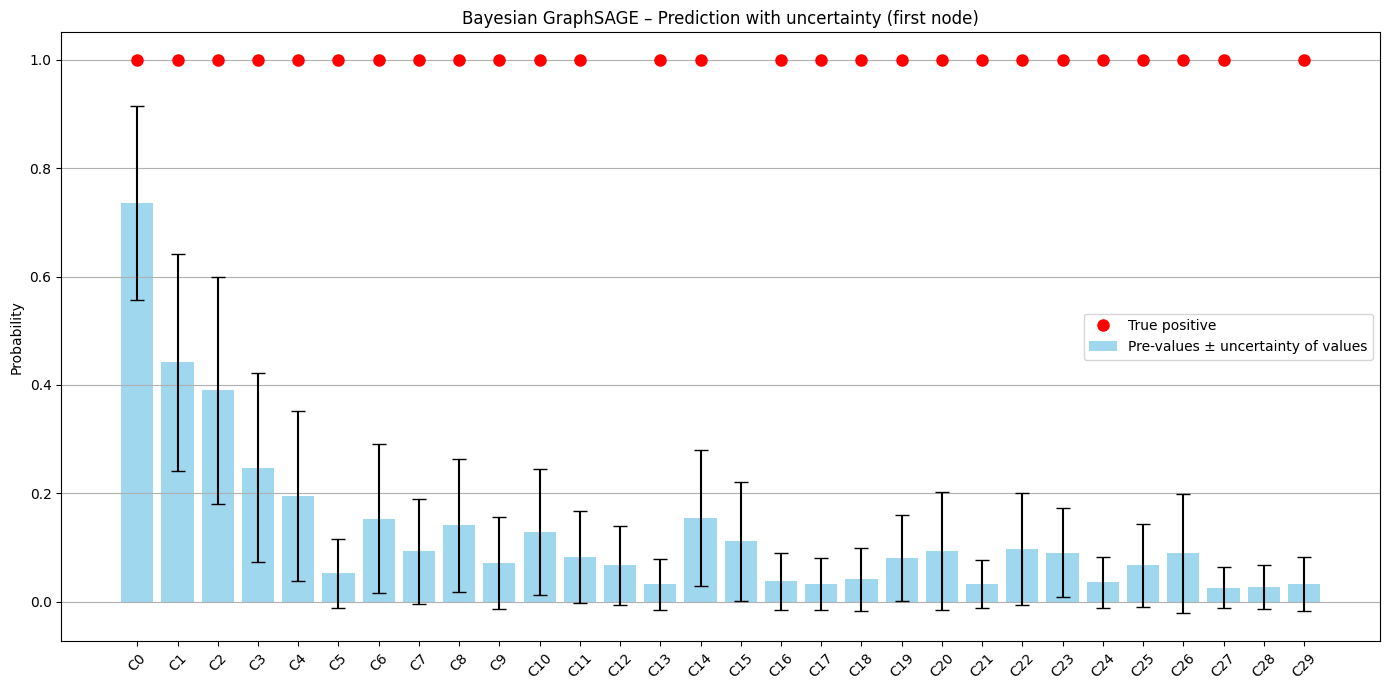


ALL DONE! Graph displayed, no errors.

Starting model export...

EXPORT MODELU (Synchronous PyTreeCheckpointer)

✓ GraphDef uložen jako pickle: /content/drive/MyDrive/model_BGSAGE/bayesian_graphsage_nnx/graphdef.pkl
✓ Model state uložen do: /content/drive/MyDrive/model_BGSAGE/bayesian_graphsage_nnx/state
✓ Posterior samples uloženy (500 samples) do: /content/drive/MyDrive/model_BGSAGE/posterior_samples

Waiting for the finalization of Orbax checkpoints...

ALL DONE! Checkpoints are fully finalized.
   • bayesian_graphsage_nnx/
     ├── graphdef.pkl          — model structure
     └── state/                — model parameters
   • posterior_samples/        — MCMC samples


In [ ]:
if __name__ == "__main__":
    # === LOADING DATASET ===
    base_dir_input = os.path.join(path_dataset, "proteins_graph_dataset")
    edges_parquet_file = os.path.join(base_dir_input, "proteins_edges.parquet")
    nodes_parquet_file = os.path.join(base_dir_input, "proteins_nodes.parquet")

    path_model_dir = os.path.join('/content','drive','MyDrive','model_BGSAGE')
    os.makedirs(path_model_dir, exist_ok=True)

    loader = OGBNProteinsLoader(
        edges_parquet=edges_parquet_file,
        nodes_parquet=nodes_parquet_file
    )

    # MCMC (posterior training) - with better hyperparameters
    posterior_samples = run_mcmc(loader, batch_size=32, num_samples=500, warmup=500)

    print("\n" + "="*70)
    print("VALIDATION")
    print("="*70)

    val_batch = loader.sample_batch(batch_size=64, split="valid")

    # Create node mapping for validation
    all_nodes = set()
    for center, neigh in val_batch:
        all_nodes.add(center)
        all_nodes.update(neigh)

    all_nodes = sorted(list(all_nodes))
    node_to_idx = {nid: i for i, nid in enumerate(all_nodes)}

    senders, receivers = [], []
    for center, neigh in val_batch:
        center_idx = node_to_idx[center]
        for n in neigh:
            n_idx = node_to_idx[n]
            senders += [center_idx, n_idx]
            receivers += [n_idx, center_idx]

    graph_data = (jnp.array(senders), jnp.array(receivers), len(all_nodes))
    X_val = jnp.array(loader.get_features(all_nodes))

    # Get predictions with more samples
    mean_pred, uncertainty = predict_with_uncertainty(posterior_samples, graph_data, X_val, n_samples=500)

    # Get labels only for center nodes
    center_nodes = [c for c, _ in val_batch]
    center_indices = jnp.array([node_to_idx[c] for c in center_nodes])
    y_val = loader.get_labels(center_nodes)

    # Extract predictions for center nodes only
    mean_pred_centers = mean_pred[center_indices]
    uncertainty_centers = uncertainty[center_indices]

    acc = ((mean_pred_centers > 0.5) == (y_val > 0.5)).mean() * 100
    print(f"\nMicro-Accuracy: {acc:.2f}%")
    print(f"Average uncertainty: {uncertainty_centers.mean():.4f}")
    print(f"Max uncertainty: {uncertainty_centers.max():.4f}")
    print(f"Min uncertainty: {uncertainty_centers.min():.4f}")

    plot_predictions(mean_pred_centers, uncertainty_centers, y_val, num_classes=30)

    print("\n" + "="*70)
    print("ALL DONE! Graph displayed, no errors.")
    print("="*70)

    print("\nStarting model export...")

    sample_batch = loader.sample_batch(batch_size=8, split="valid")
    s, r = [], []
    for center, neigh in sample_batch:
        for n in neigh:
            s += [center, n]
            r += [n, center]

    sample_x = loader.get_features([c for c, _ in sample_batch])[:4]
    sample_senders = jnp.array(s[:200])
    sample_receivers = jnp.array(r[:200])

    export_model = BayesianGraphSAGE()  # čistý model

    export_model_all_formats(
        model=export_model,
        posterior_samples=posterior_samples,
        output_dir=path_model_dir
    )

## ***INFERENCE ON A LEARNED BAYESIAN GRAPHSAGE MODEL***

DIAGNOSTIC REPORT

✓ Found posterior_samples at: /content/drive/MyDrive/model_BGSAGE/posterior_samples

Posterior samples keys:
  - b1: shape=(500, 256), dtype=float32
  - b2: shape=(500, 112), dtype=float32
  - w1: shape=(500, 16, 256), dtype=float32
  - w1_scale: shape=(500,), dtype=float32
  - w2: shape=(500, 512, 112), dtype=float32
  - w2_scale: shape=(500,), dtype=float32

✓ w1 shape: (500, 16, 256)
  Expected: (num_samples, 16, 256)
✓ w2 shape: (500, 512, 112)
  Expected: (num_samples, 512, 112)
=== LOADING THE MODEL AND POSTERIOR SAMPLES ===

✓ Model directory found
✓ Loaded 500 posterior samples

I'm preparing a test batch...
Test batch ready: 32 central nodes, 752 total nodes in subgraph

Running Bayesian Monte Carlo inference (50 samples)...
Processing one sample at a time to minimize memory usage...



MC Inference: 100%|█████████████████████████████| 50/50 [00:05<00:00,  9.65it/s]



BAYESIAN GRAPHSAGE — TEST SET RESULTS
Accuracy Test (Monte Carlo average): 95.51%
Average epistemic uncertainty (on all subgraph nodes): 0.01620
Maximum uncertainty (on all subgraph nodes): 0.44450



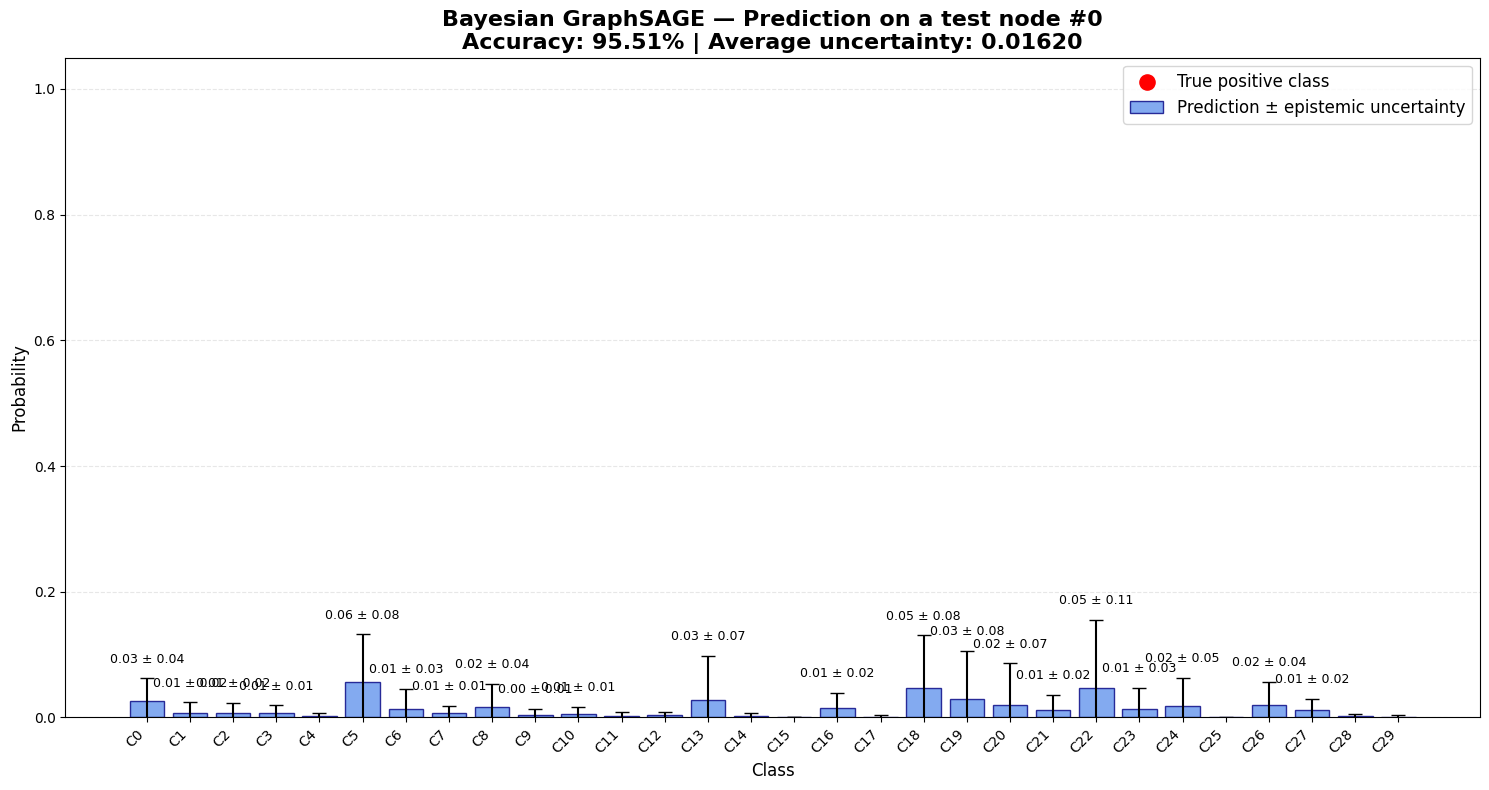


✓ Visualization saved as 'bayesian_graphsage_inference_results.png'


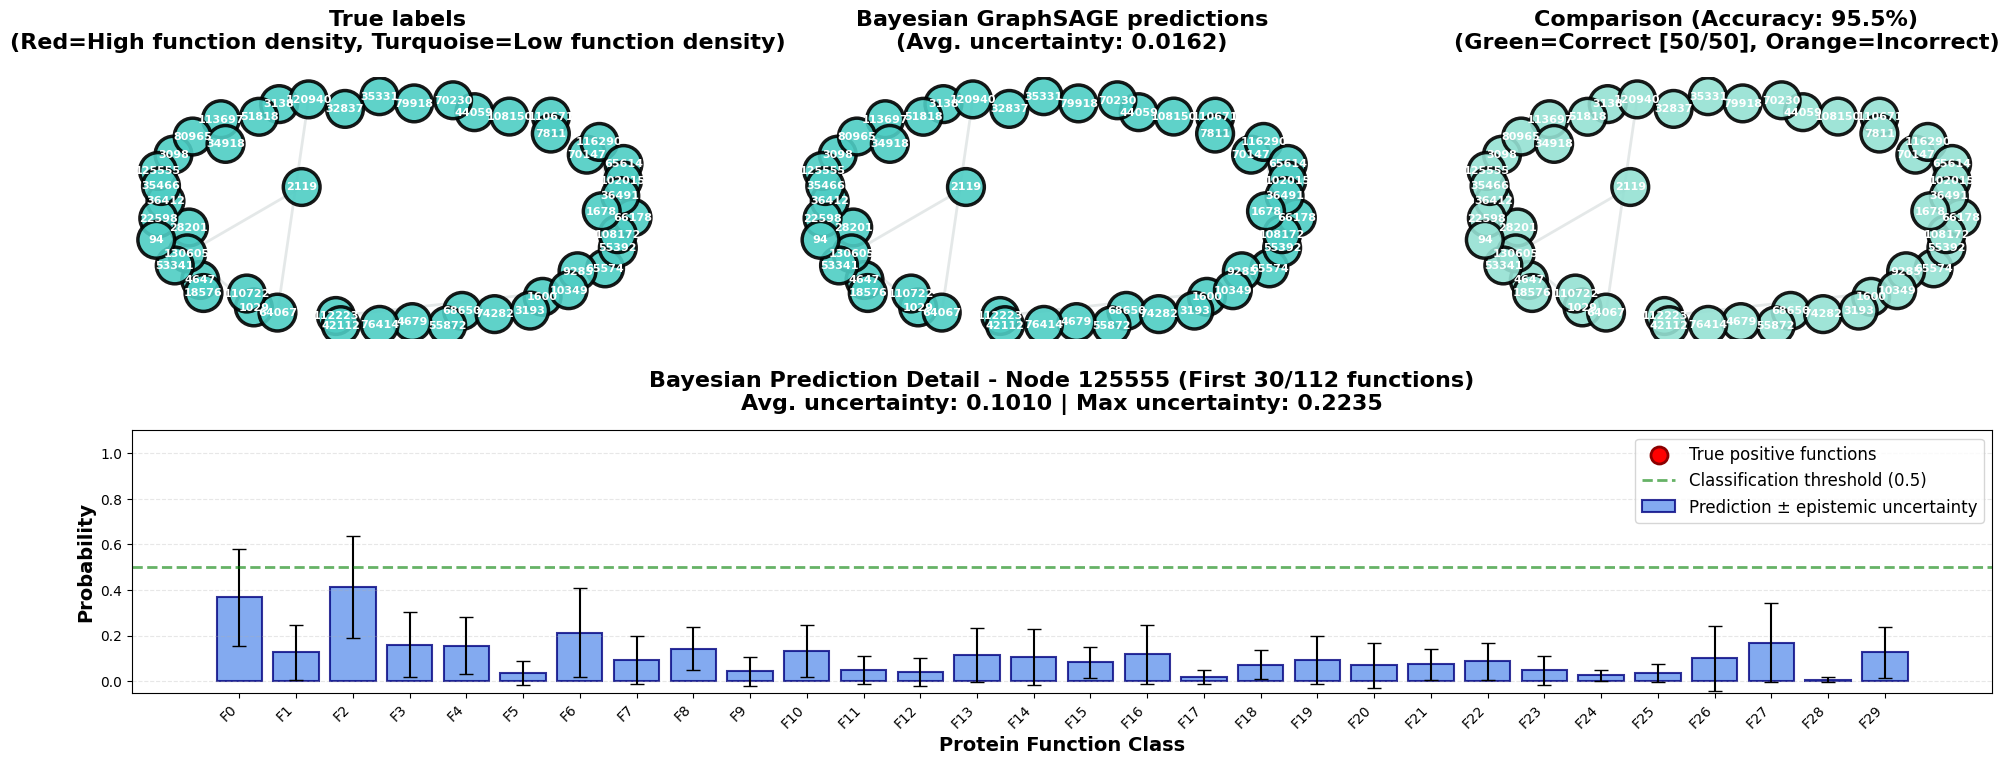


VISUALIZATION STATISTICS
Nodes visualized: 50
Edges visualized: 5
Overall accuracy: 95.51%
Average uncertainty: 0.01620
Max uncertainty: 0.44450
Min uncertainty: 0.00000
Correct predictions in graph: 50/50 (100.0%)



In [ ]:
# First, run diagnostics to see what's in the saved files
posterior_samples = diagnose_saved_model(path_model_dir)

# INFERENCE - Start with very conservative settings
mean_pred, uncertainty, y_test, acc, test_batch_actual, node_to_idx_actual = load_and_run_inference(
    loader,
    path_model_dir,
    n_mc=50,        # Start with just 50 samples
    batch_size=32   # Very small batch
)

# VISUALIZE
plot_bayesian_prediction(mean_pred, uncertainty, y_test, acc, node_idx=0, num_classes=30)

visualize_bayesian_graphsage_inference(
    loader=loader,
    mean_pred=mean_pred,
    uncertainty=uncertainty,
    y_test=y_test,
    test_batch=test_batch_actual,
    node_to_idx=node_to_idx_actual,
    acc=acc,
    loss_history=None,  # Add if you have MCMC convergence data
    max_nodes=50,
    num_classes_to_show=30,
    output_path='bayesian_graphsage_inference_results.png'
)